Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import cv2
import glob
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC, NuSVC
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

Function to import images and labels of needed Training or Test fruits.

In [2]:
def getFruits(fruits, set):
    images = []
    labels = []
        
    for i,f in enumerate(fruits):
        fruitFolder_path = "../fruits-360/" + set + "/" + f
        j=0
        for image_path in glob.glob(fruitFolder_path + "/*.jpg"):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)   
            # image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)   
            # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            # b , g , r = cv2.split(image)
            images.append(image)
            labels.append(i)
            j+=1
        print("There are " , j, set, "images of " , fruits[i].upper())
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

Getting fruits training and test sets

In [3]:
fruits = ['Pineapple' , 'Cocos']
training_images, training_labels = getFruits(fruits,"Training")
test_images, test_labels = getFruits(fruits,"Test")
print(np.shape(training_images[0]))

There are  490 Training images of  PINEAPPLE
There are  490 Training images of  COCOS
There are  166 Test images of  PINEAPPLE
There are  166 Test images of  COCOS
(100, 100)


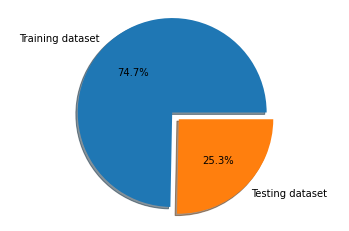

In [4]:
labels = ['Training dataset', 'Testing dataset']
sizes = [len(training_labels), len(test_labels)]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 

plt.show()

In [82]:
pineapple_train_images, pineapple_train_labels = getFruits(['Pineapple'],"Training")
pineapple_test_images, pineapple_test_labels = getFruits(['Pineapple'],"Test")

cocos_train_images, cocos_train_labels = getFruits(['Cocos'],"Training")
cocos_test_images, cocos_test_labels = getFruits(['Cocos'],"Test")

There are  490 Training images of  PINEAPPLE
There are  166 Test images of  PINEAPPLE
There are  490 Training images of  COCOS
There are  166 Test images of  COCOS


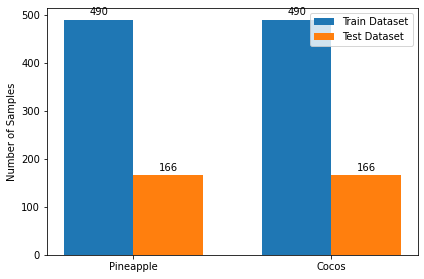

In [83]:
labels = ['Pineapple', 'Cocos']
training = [len(pineapple_train_labels),  len(cocos_train_labels)]
testing = [len(pineapple_test_labels), len(cocos_test_labels)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training, width, label='Train Dataset')
rects2 = ax.bar(x + width/2, testing, width, label='Test Dataset')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Samples')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### - Function that grids pictures

In [7]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    n = 0
    if(nb_rows == 1 or nb_cols ==1):
            for i in range(0,nb_cols+nb_rows-1):
                axs[i].axis('off')
                axs[i].imshow(images[n])
                n += 1
    else:
        for i in range(0, nb_rows):
            for j in range(0, nb_cols):
                axs[i, j].axis('off')
                axs[i, j].imshow(images[n])
                n += 1

Grid of first 100 pictures of pineapples training set

Images of class 0


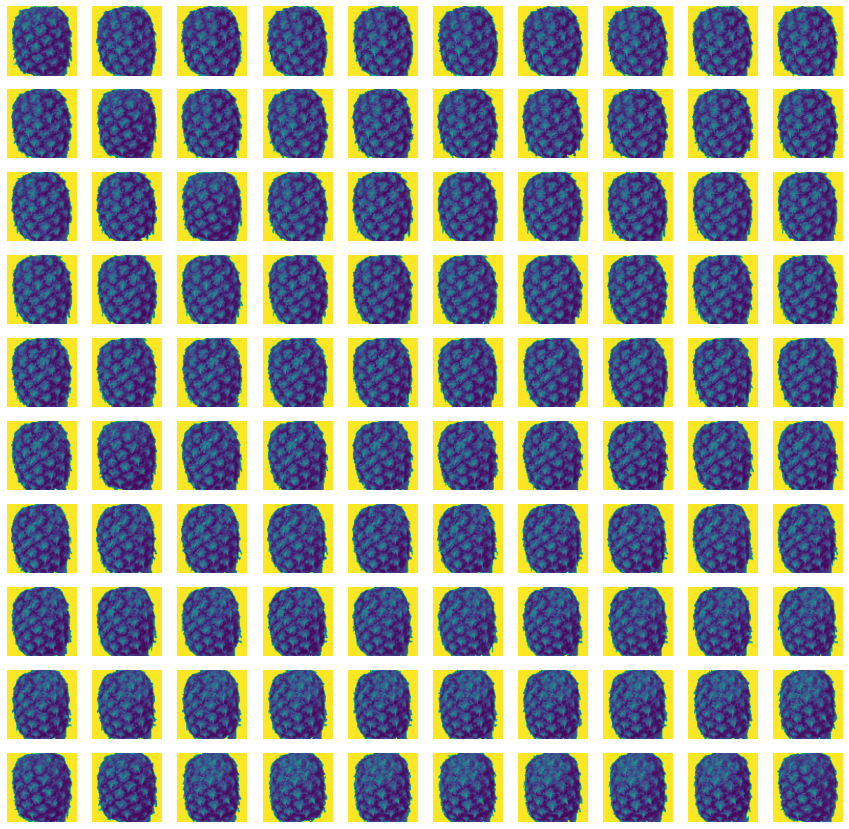

In [8]:
print("Images of class", training_labels[69])
plot_image_grid(training_images[0:100],10,10)

### Data transformation:
&emsp;&emsp;&emsp;&emsp; - Tranform RGB pics (100x100x3) to grayscale (100x100) <br>
&emsp;&emsp;&emsp;&emsp; - Linearizes each picture (100x100) into a linear array (10,000).

In [9]:
scaler = StandardScaler()
X_train = [i.flatten() for i in training_images]
X_test = [i.flatten() for i in test_images]
print(np.shape(X_train[0]))
print(X_train[0])

(10000,)
[255 255 255 ... 255 255 255]


### - PCA on grayscale images and scale it back to RGB

In [10]:
def performPCA(n, images_scaled):
    pca = PCA(n)
    pc = pca.fit_transform(images_scaled) # 30,000 -> n
    return pca, pc

In [11]:
# function to reduce dimensions
def perform_and_inverse_PCA(n, images_scaled):
    pca, pc = performPCA(n, images_scaled) # 30,000 BW -> n
    reducedBWImages = pca.inverse_transform(pc) # n -> 30,000 BW
    reducedRGBImages = None #scaler.inverse_transform(reducedBWImages) # 30,000 BW -> 30,000 RGB
    return pc, reducedBWImages, reducedRGBImages

In [12]:
#Compute PCA on train data for 2, 10, 50 PCs
train_pc_2, train_reducedBWImages_2, train_reducedRGBImages_2 = perform_and_inverse_PCA(2, X_train)
train_pc_10, train_reducedBWImages_10, train_reducedRGBImages_10 = perform_and_inverse_PCA(10, X_train)
train_pc_50, train_reducedBWImages_50, train_reducedRGBImages_50 = perform_and_inverse_PCA(50, X_train)

#Compute PCA on test data for 2, 10, 50 PCs
test_pc_2, test_reducedBWImages_2, test_reducedRGBImages_2 = perform_and_inverse_PCA(2, X_test)
test_pc_10, test_reducedBWImages_10, test_reducedRGBImages_10 = perform_and_inverse_PCA(10, X_test)
test_pc_50, test_reducedBWImages_50, test_reducedRGBImages_50 = perform_and_inverse_PCA(50, X_test)


### - Show PCA results on a sample image for 2, 10, 50 principal components

In [13]:
def showPCA(image,X2, X10, X50):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image)
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off') 
    ax1.set_title('50 PC')
    plt.imshow(X50)
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off') 
    ax1.set_title('10 PC')
    plt.imshow(X10)
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off') 
    ax2.set_title('2 PC')
    plt.imshow(X2)
    plt.show()


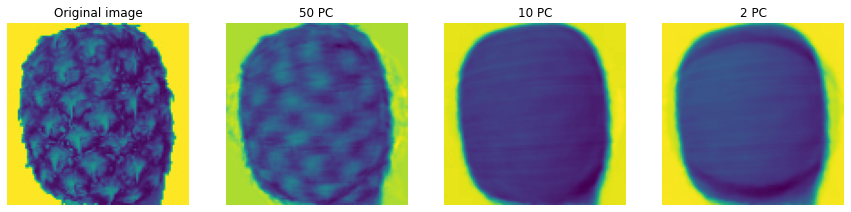

In [14]:
image_id = 1
image = training_images[image_id]

#Reshape in order to plot images
X2 = np.reshape(train_reducedBWImages_2[image_id], (100,100)).astype(int)
X10 = np.reshape(train_reducedBWImages_10[image_id], (100,100)).astype(int)
X50 = np.reshape(train_reducedBWImages_50[image_id], (100,100)).astype(int)

showPCA(image, X2, X10, X50)

# SVM

### - SVM + PCA

Train and Test SVM model considering different count of PCs to find best accuracy.

80
2
82
2
84
2
86
2
88
2
90
2
92
2
94
2
96
2
98
2
Best acuracy obtained for linear SVM classifier with PCA is 78.91566265060241% with PCA of 82 features.


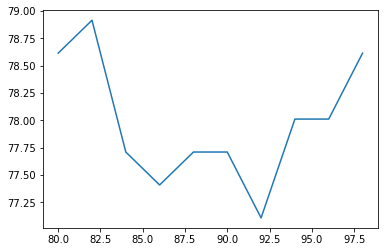

In [15]:
x_graph = list(range(1,100))
y_graph = []
max_accuracy = max_accuracy_pc = 0
for i in x_graph:
    # PCA
    pca, train_pc = performPCA(i, X_train)
    pca, test_pc = performPCA(i, X_test)
    
    # SVM train
    svm = SVC(kernel="linear", probability=True) # Probability = True, enables 5-fold cross validation.
    svm.fit(train_pc, training_labels)

    # SVM test
    y_pred=svm.predict(test_pc)
    precision = metrics.accuracy_score(y_pred, test_labels) * 100
    y_graph.append(precision)
    if precision > max_accuracy:
        max_accuracy = precision
        max_accuracy_pc = i

print(f"Best acuracy obtained for linear SVM classifier with PCA is {max_accuracy}% with PCA of {max_accuracy_pc} features.")

plt.plot(x_graph,y_graph)
plt.title('Linear SVM with PCA')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy %')
plt.grid()
plt.show()

Visualize linear SVM decision boundaries after dimensionality reduction to 2 features.

1
2
Accuracy with SVM considering only first 2PC: 92.17%
3


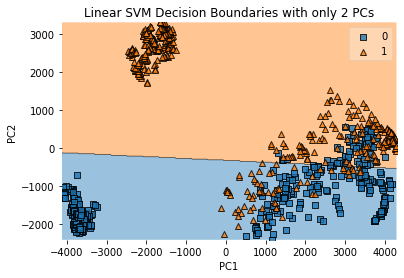

In [16]:
# PCA reduce dimensions to 2
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

# SVM train
svm = SVC(kernel='linear', probability=True) # Probability = True, enables 5-fold cross validation.
svm.fit(X_train2D, training_labels) 
# SVM test
test_predictions = svm.predict(X_test2D)
precision = metrics.accuracy_score(test_predictions, test_labels) * 100
print("Accuracy with SVM considering only first 2PC: {0:.2f}%".format(precision))
# plot decision boundry
plot_decision_regions(X_train2D, training_labels, clf=svm, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Linear SVM Decision Boundaries with only 2 PCs')
plt.show()

### - SVM without PCA

In [17]:
# SVM train
svm = SVC(kernel="linear", probability=True) # Probability = True, enables 5-fold cross validation.
svm.fit(X_train, training_labels)

# SVM test
y_pred=svm.predict(X_test)
precision = metrics.accuracy_score(y_pred, test_labels) * 100

print(f"Acuracy obtained for linear SVM classifier without PCA is {precision}%.")

Acuracy obtained for linear SVM classifier without PCA is 94.27710843373494%.


# SVM with RBF kernel

Best acuracy obtained for linear SVM classifier with PCA is 86.74698795180723% with PCA of 2 features.


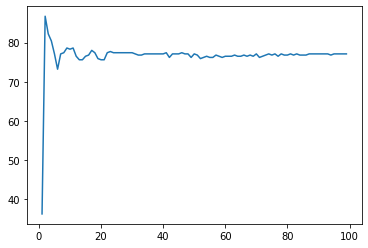

In [22]:
x_graph = list(range(1,100))
y_graph = []
max_accuracy = max_accuracy_pc = 0
for i in x_graph:
    # PCA
    pca, train_pc = performPCA(i, X_train)
    pca, test_pc = performPCA(i, X_test)
    
    # SVM train
    svm = SVC(kernel="rbf", probability=True) # Probability = True, enables 5-fold cross validation.
    svm.fit(train_pc, training_labels)
    
    # SVM test
    y_pred=svm.predict(test_pc)
    precision = metrics.accuracy_score(y_pred, test_labels) * 100
    y_graph.append(precision)
    if precision > max_accuracy:
        max_accuracy = precision
        max_accuracy_pc = i

print(f"Best acuracy obtained for linear SVM classifier with PCA is {max_accuracy}% with PCA of {max_accuracy_pc} features.")

plt.plot(x_graph,y_graph)
plt.title('SVM with RBF kernel accuracy with PCA')
plt.xlabel('Principle Components')
plt.ylabel('Accuraacy %')
plt.grid()
plt.show()

Accuracy with RBF considering only first 2PC: 86.75%


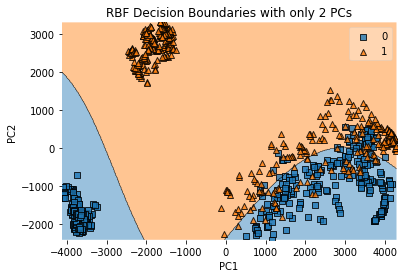

In [21]:
# PCA reduce dimensions 10,000 to 2
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

# SVM train
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train2D, training_labels) 

# SVM test
test_predictions = svm.predict(X_test2D)
precision = metrics.accuracy_score(test_predictions, test_labels) * 100
print("Accuracy with RBF considering only first 2PC: {0:.2f}%".format(precision))

# plot decision boundry
plot_decision_regions(X_train2D, training_labels, clf=svm, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('RBF Decision Boundaries with only 2 PCs')
plt.show()

In [23]:
# SVM train
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, training_labels)

# SVM test
y_pred=svm.predict(X_test)
precision = metrics.accuracy_score(y_pred, test_labels) * 100
print(f"Accuracy with RBF: {precision}%")

Accuracy with RBF: 95.48192771084338%


# KNN

Using 2 nearest neighbours

In [31]:
max_accuracy = max_accuracy_pc = max_accuracy_k = 0
for k in range(1, 51):
    for p in range(2, 50, 2):
        
        pca, train_pc = performPCA(p, X_train)
        pca, test_pc = performPCA(p, X_test)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_pc, training_labels)
        y_pred = knn.predict(test_pc)
        precision = metrics.accuracy_score(y_pred, test_labels) * 100
        if precision > max_accuracy:
            max_accuracy = precision
            max_accuracy_pc = p
            max_accuracy_k = k

print(f"Best acuracy obtained for KNN classifier with PCA is {max_accuracy}% with PCA of {max_accuracy_pc} features and at k = {max_accuracy_k}.")


86.44578313253012 2 33


In [ ]:
x_graph = list(range(1,100))
y_graph = []
max_accuracy = max_accuracy_k = 0
for k in x_graph:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, training_labels)
    y_pred = knn.predict(X_test)
    precision = metrics.accuracy_score(y_pred, test_labels) * 100
    y_graph.append(precision)
    if precision > max_accuracy:
        max_accuracy = precision
        max_accuracy_k = k

print(f"Best acuracy obtained for KNN classifier without PCA is {max_accuracy}% at k = {max_accuracy_k}.")

plt.plot(x_graph, y_graph)
plt.title('KNN accuracy without PCA')
plt.xlabel('Nearest Neighbors')
plt.ylabel('Accuraacy %')
plt.grid()
plt.show()


In [44]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_pc_10, training_labels)
y_pred = knn.predict(test_pc_10)

In [45]:
print(f"The model is {metrics.accuracy_score(y_pred,test_labels)*100}% accurate")

The model is 83.73493975903614% accurate


Using 10 nearest neighbours

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_pc_2, training_labels)
y_pred = knn.predict(test_pc_2)
print(f"The model is {metrics.accuracy_score(y_pred,test_labels)*100}% accurate")

The model is 85.54216867469879% accurate


# DECISION TREES

Training decision tree mode; building the tree

In [80]:

# PCA
pca, train_pc = performPCA(2, X_train)
pca, test_pc = performPCA(2, X_test)

s = set()
for i in range(50):
    # SVM train
    dt = DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train, training_labels)
    # SVM test
    y_pred=dt.predict(X_test)
    precision = metrics.accuracy_score(y_pred, test_labels) * 100
    s.add(tuple([precision, dt.get_depth()]))

print(s)

{(98.19277108433735, 6), (96.3855421686747, 6), (97.59036144578313, 6), (97.28915662650603, 6), (96.08433734939759, 6), (95.18072289156626, 6), (95.78313253012048, 6), (95.48192771084338, 6), (94.57831325301204, 6), (92.7710843373494, 6), (96.98795180722891, 6), (96.6867469879518, 6), (93.07228915662651, 6)}


In [81]:
max_accuracy = max_accuracy_pc = max_accuracy_d = 0
for p in range(1, 100):
    # PCA
    pca, train_pc = performPCA(p, X_train)
    pca, test_pc = performPCA(p, X_test)
    
    # SVM train
    dt = DecisionTreeClassifier(criterion='entropy')
    dt.fit(train_pc, training_labels)
    
    # SVM test
    y_pred=dt.predict(test_pc)
    precision = metrics.accuracy_score(y_pred, test_labels) * 100
    if precision > max_accuracy:
        max_accuracy = precision
        max_accuracy_d = dt.get_depth()
        max_accuracy_pc = p
            
print("max_accuracy:", max_accuracy, "at", max_accuracy_pc, "principal components and tree of", max_accuracy_d, "depth.")

max_accuracy: 96.08433734939759 at 2 principal components and tree of 21 depth.
